# Background Information

Your client is a medical research company, and you are asked to improve the early detection of breast cancer using machine learning. The goal of the project is to train a machine learning model which predicts whether the cancer is benign or malignant.

The dataset is composed of features computed from a digitised image of a fine needle aspirate (FNA) of a breast mass. They describe the characteristics of cell nuclei present in the image.

We will follow this plan for our project:
* I. Data exploration 
* II. Data visualisation
* III. Data preprocessing
* IV. Feature and model selection
* V. Conclusion

# I. Data Exploration 

We import relevant libraries (pandas, numpy, matplotlib, seaborn) and load the dataset.

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_csv("data.csv")

We start with basic data analysis to check the data size, its attributes and any missing/null values in our dataset.

In [38]:
print("Cancer data set dimensions : {}".format(dataset.shape))

Cancer data set dimensions : (569, 33)


In [39]:
# have a look at the head
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [40]:
# describe the data
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [41]:
# get the type of each attribute
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [42]:
# check for missing or null values
dataset.isnull().sum() # OR use dataset.isnull().values.any()
dataset.isna().sum() # OR use dataset.isna().values.any()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

We observe that the dataset contains 569 records (images) and each record has 32 attributes. These include ID number, diagnosis (B = benign and M = malignant) and 30 real-valued input features.

10 different features are recorded, but there are three columns for each feature (mean, standard error and worst), hence resulting in the 30 remaining columns.The 'worst' value is the mean of the three largest values for that feature.

The features recorded to four significant figures are:
* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness (perimeter^2 / area - 1.0)
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry
* fractal dimension ("coastline approximation" - 1)

We note that the id column is useless for classification along with the Unnamed:32 column which contains only null values. We also notice that the range of values between features is high too.

We will split the numerical columns and target categorical column seprately while dropping 2 unnecessary columns (Unnamed: 32 and id). 
We will also hot encode the target as this will give a neutral representation of the data (i.e. does not assign an order) to perform analysis.
We will check once more now whether we have any null values to make sure we have removed them all.

In [43]:
int64_df = dataset.select_dtypes(include=['int64'])
object_df = dataset.select_dtypes(include=['object']).astype('category')
one_hot_df = pd.get_dummies(dataset, drop_first=True)
one_hot_df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,1


In [44]:
target = one_hot_df['diagnosis_M']  
list = ['Unnamed: 32','id','diagnosis_M']
x = one_hot_df.drop(list,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [45]:
#check if there is a null value in our x df
x.isnull().values.any()

False

# II. Data visualisation

In order to gain a better understanding of our data we will use 4 different visualisations to find best feature candidates for our problem.

Plot 1 - Bar graph: We will plot the target feature to determine the number of patients which are diagnosed as malignant or benign . We observe that the class distribution is 357 benign, 212 malignant with a ratio of 0.59 which is a good sign for our analysis.

Number of Benign:  357
Number of Malignant :  212


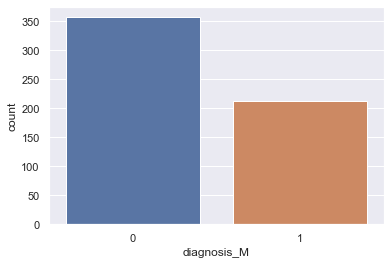

In [46]:
sns.set(style="darkgrid")
ax = sns.countplot(x = target)       
B, M = target.value_counts(sort=True) #sorting to have B then M
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

Plot 2 - Histogram: We then show the distribution of the features. We can see that features like concave_points_mean, smoothness_mean, symmetry_mean and perimeter_mean are skewed so we will avoid using them as features with gaussian distribution would be the most useful for our classifier.

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/anaconda3/lib/python3.6/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/anaconda3/lib/python3.6/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/anaconda3/lib/python3.6/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning: 
The colNu

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12282c5c0>,
      dtype=object)

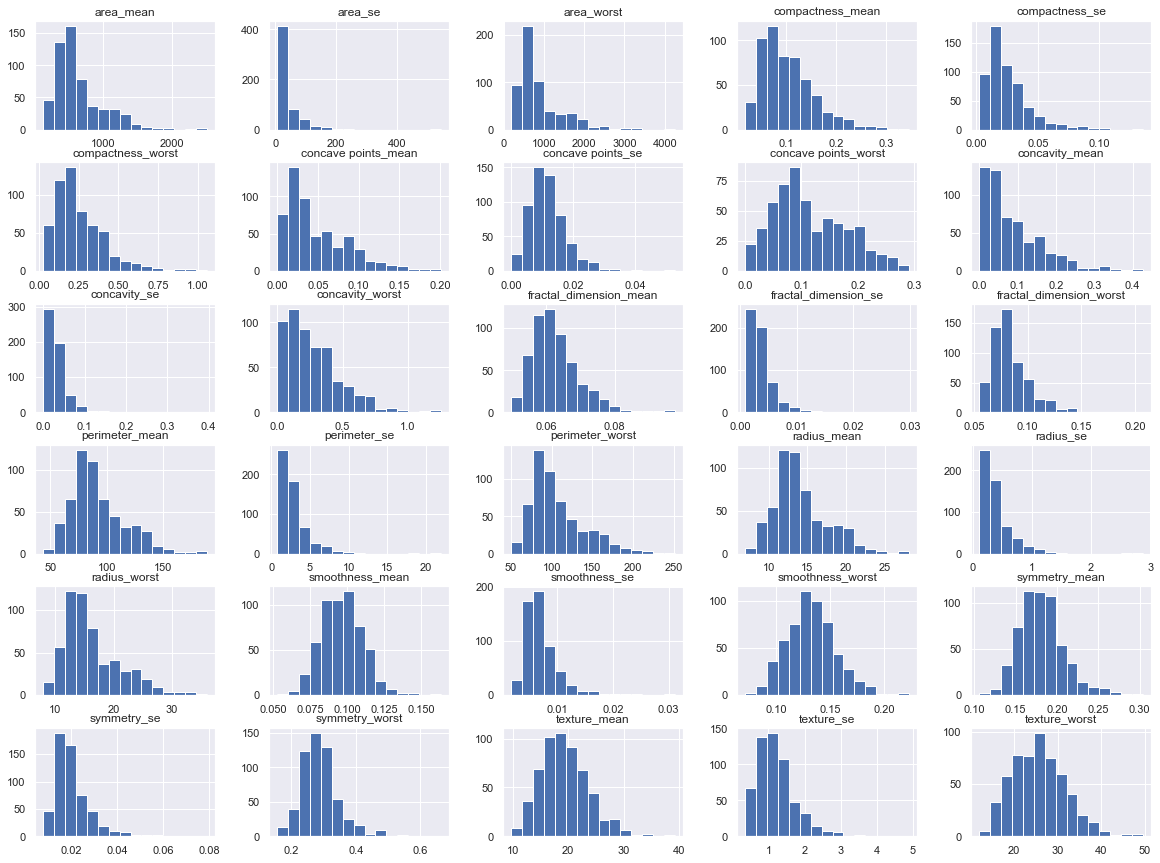

In [47]:
x.hist(bins=15, figsize=(20,15))

We normalise by standardization to put features on the same scale as some features like area_mean and concavity_mean have a big scale difference.The method takes a feature, compute its mean and standard deviation, then substract the feature by its mean, and divide the result by the standard deviation.

In [48]:
data = x
data_nor = (data - data.mean()) / (data.std())  

Plot 3 - Violin plot: We will then plot the features using a violin plot along its different quartiles. We know that features with similar distribution for both types of diagnosis should be considered for elimination due to possible correlation.

We can see for example that radius_mean, perimeter_mean, area_mean, compactness_mean, concavity_mean, concave_points_mean are good candidates for the classifier, as the 75 percentile of benign tumors is below the 25 percentile of malignant tumors. However, fracta_dimension_mean or texture_se have the same median for both tumor types, so should possibly be dropped.

In [49]:
def violin_plot(beginning,end):
    data = pd.concat([target,data_nor.iloc[:,beginning:end]],axis=1)
    data = pd.melt(data, id_vars="diagnosis_M", var_name="features", value_name='value')
    plt.figure(figsize=(13,10))
    sns.violinplot(x="features", y="value", hue="diagnosis_M", data=data, split=True, inner="quart")
    plt.xticks(rotation=90)

Violin plot of the 31 features


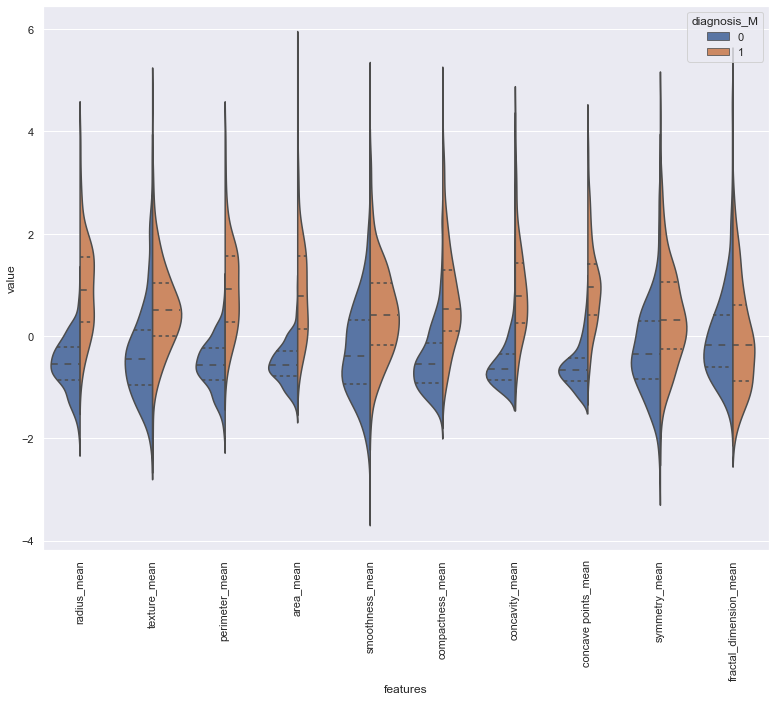

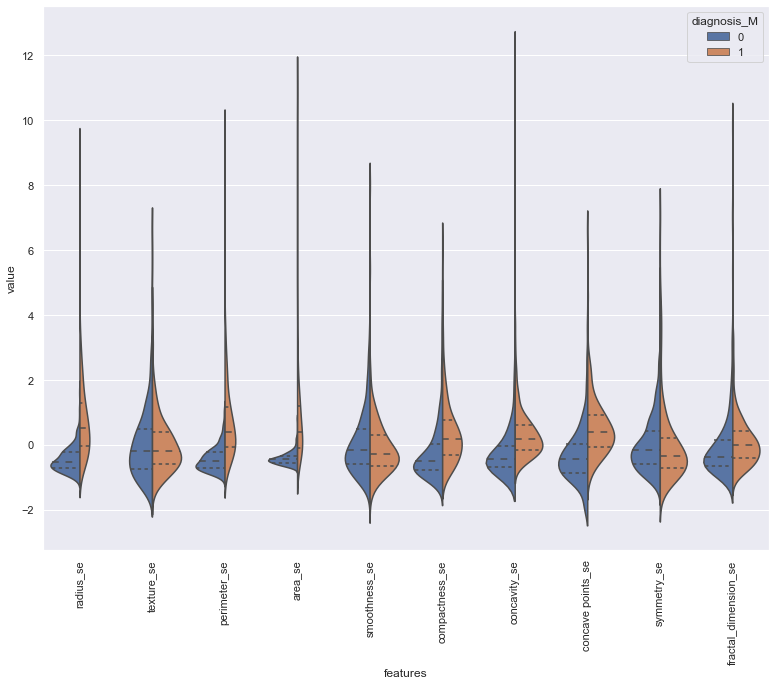

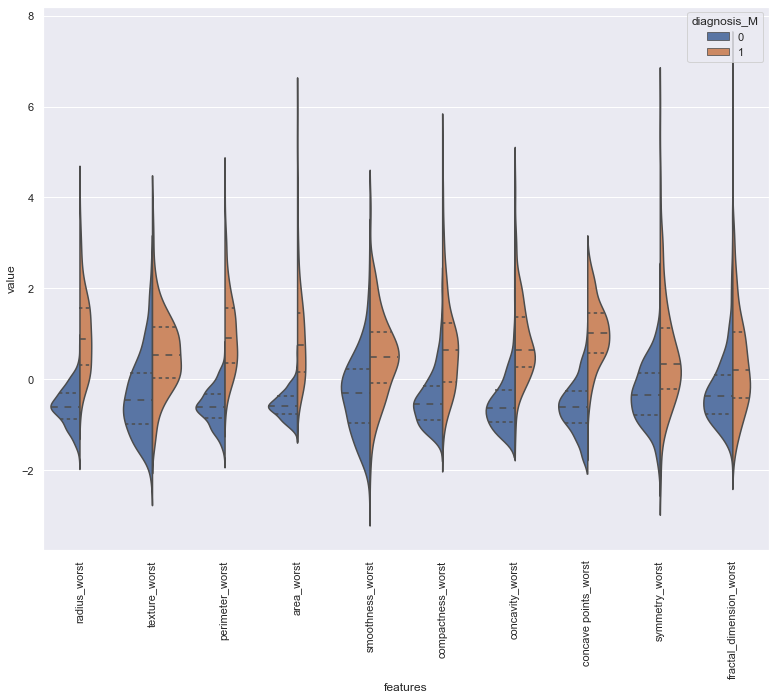

In [50]:
print("Violin plot of the 31 features")
violin_plot(0,10)
violin_plot(10,20)
violin_plot(20,31)

Plot 4 - Correlation map: We will then use the below correlation map to confirm our observation in order to eliminate the unnecessary features.

Correlation matrices / heatmaps display Pearson's Product Moment Correlation Coefficient. This can range from 1 (perfect positive correlation) to -1 (perfect negative correlation).**Therefore, we are interested in features whose coefficients are nearest to 1 or -1.**

We observe correlation between:
* area_worst and area_mean so we drop area_worst.
* texture_mean and texture_worst so we drop texture_worst.
* compactness_se, concavity_se and concave points_se so we keep only concavity_se.
* compactness_worst, concavity_worst and concave points_worst we keep only concavity_worst.
* radius_worst, perimeter_worst and area_worst so we drop all except area_worst.
* radius_se, perimeter_se and area_se so we drop all except area_se.
* Compactness_mean, concavity_mean and concave points_mean so we keep only concavity_mean.

Once we drop the above features, we plot once more another correlation map to see whether we eliminated all highly correlated features to obtain almost uncorrelated matrix.

Correlation map 1


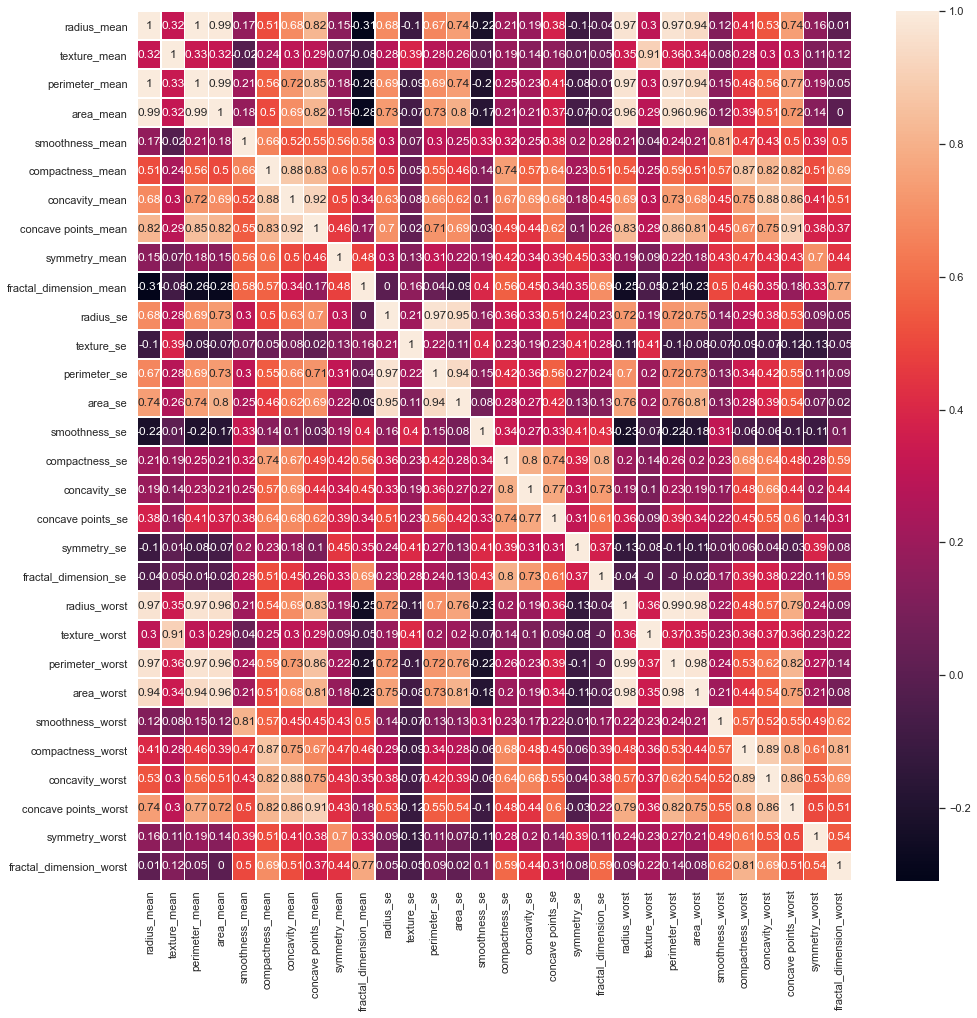

In [51]:
print("Correlation map 1")
plt.figure(figsize = (16,16))
correlation_matrix = x.corr().round(2)
sns.heatmap(data = correlation_matrix, annot = True,linewidths=.5)
plt.show()

In [52]:
#Droping all unnecessary features after above analysis
drop_list = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x1 = x.drop(drop_list,axis = 1 ) 
x1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


We observe that we obtained now an almost uncorrelated matrix.

Correlation map 2


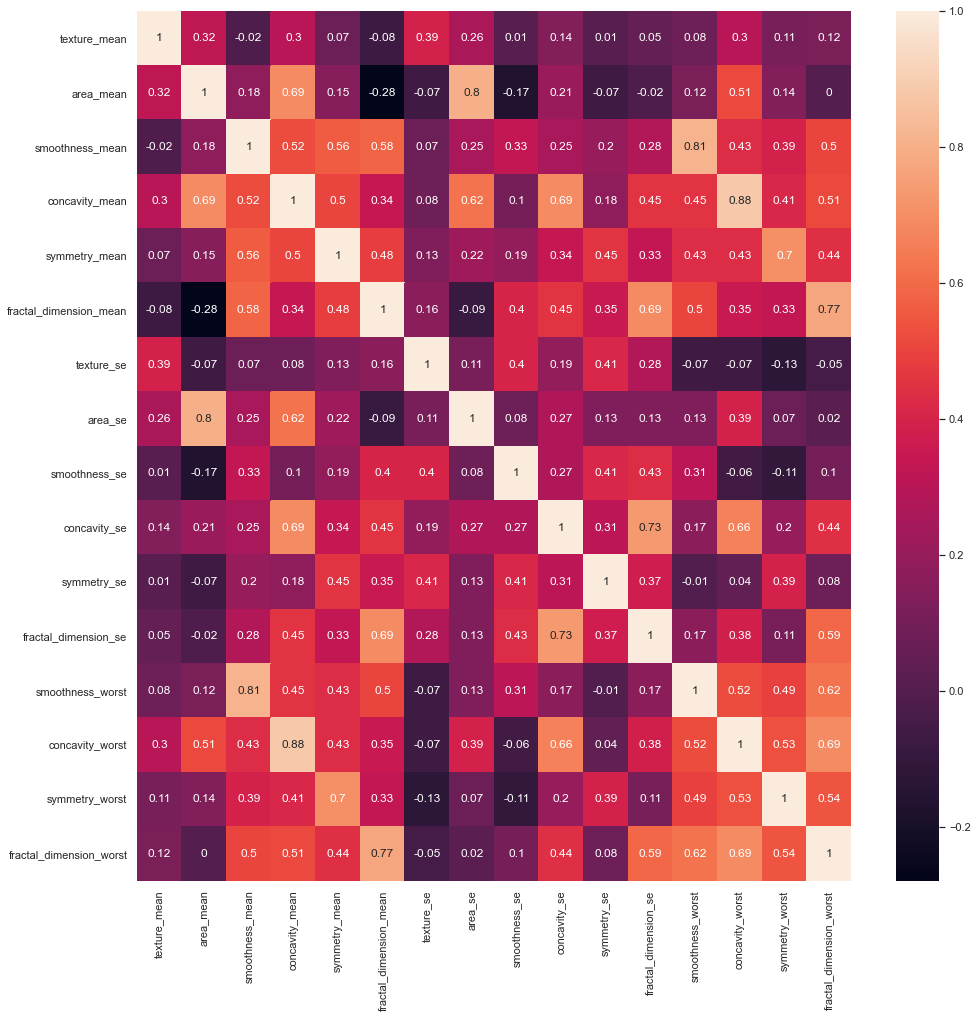

In [53]:
#Correlation map to check no remaining correlated features
print("Correlation map 2")
plt.figure(figsize = (16,16))
correlation_matrix = x1.corr().round(2)
sns.heatmap(data = correlation_matrix, annot = True)
plt.show()

# III. Data preprocessing**

### Options for feature selection

Feature selection is when you identify key features of interest and drop the ones that are not useful.

There is more than one way of doing this, for example:
* **Handpicking** by using the correlation matrix above to identify features most correlated with target
* **Using PCA** to reduce the feature space

# Model 1: handpicked features, outliers left in

We want to create two versions of the model, one including outliers and one excluding outliers, to see how it affects performance.First let's see how many outliers there are. 

In [54]:
# identifying outliers using IQR
Q1 = x1.quantile(0.25)
Q3 = x1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

texture_mean                 5.630000
area_mean                  362.400000
smoothness_mean              0.018930
concavity_mean               0.101140
symmetry_mean                0.033800
fractal_dimension_mean       0.008420
texture_se                   0.640100
area_se                     27.340000
smoothness_se                0.002977
concavity_se                 0.026960
symmetry_se                  0.008320
fractal_dimension_se         0.002310
smoothness_worst             0.029400
concavity_worst              0.268400
symmetry_worst               0.067500
fractal_dimension_worst      0.020620
dtype: float64


In [55]:
#visualising outliers
visualise = ( x1 < (Q1 - 1.5 * IQR)) |(x1 > (Q3 + 1.5 * IQR))
#visualise.head()
visualise[visualise == True].count()

texture_mean                7
area_mean                  25
smoothness_mean             6
concavity_mean             18
symmetry_mean              15
fractal_dimension_mean     15
texture_se                 20
area_se                    65
smoothness_se              30
concavity_se               22
symmetry_se                27
fractal_dimension_se       28
smoothness_worst            7
concavity_worst            12
symmetry_worst             23
fractal_dimension_worst    24
dtype: int64

Can see we have quite a few outliers for each column, but some of these records might overlap (so might not be as many as it looks).

In [56]:
#creating a subset of the data without outliers
handpicked_predictors_outliers_removed = x1[~((x1 < (Q1 - 1.5 * IQR)) |(x1 > (Q3 + 1.5 * IQR))).any(axis=1)]
#handpicked_predictors_outliers_removed.shape
handpicked_predictors_outliers_removed.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
1,17.77,1326.0,0.08474,0.08690,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
6,19.98,1040.0,0.09463,0.11270,0.1794,0.05742,0.7732,53.91,0.004314,0.02254,0.01369,0.002179,0.1442,0.3784,0.3063,0.08368
7,20.83,577.9,0.11890,0.09366,0.2196,0.07451,1.3770,50.96,0.008805,0.02488,0.01486,0.005412,0.1654,0.2678,0.3196,0.11510
10,23.24,797.8,0.08206,0.03299,0.1528,0.05697,1.1870,40.51,0.004029,0.01101,0.01460,0.003042,0.1181,0.1459,0.2948,0.08452
11,17.89,781.0,0.09710,0.09954,0.1842,0.06082,0.9849,54.16,0.005771,0.02791,0.02008,0.004144,0.1396,0.3965,0.3792,0.10480


In [57]:
handpicked_predictors_outliers_removed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402 entries, 1 to 566
Data columns (total 16 columns):
texture_mean               402 non-null float64
area_mean                  402 non-null float64
smoothness_mean            402 non-null float64
concavity_mean             402 non-null float64
symmetry_mean              402 non-null float64
fractal_dimension_mean     402 non-null float64
texture_se                 402 non-null float64
area_se                    402 non-null float64
smoothness_se              402 non-null float64
concavity_se               402 non-null float64
symmetry_se                402 non-null float64
fractal_dimension_se       402 non-null float64
smoothness_worst           402 non-null float64
concavity_worst            402 non-null float64
symmetry_worst             402 non-null float64
fractal_dimension_worst    402 non-null float64
dtypes: float64(16)
memory usage: 53.4 KB


****Not same features selected so would you mind reimplementing your 4 models train and test bit Amber with these features as i dont fully get it to replace the features? thank you!

#### First, need to split the data into train and test
Going to use stratified sampling to ensure the classes are balanced in both the train and test set. Going to use a split of 80:20 (train:test).

# Model 2: handpicked features, outliers removed

**This model uses data that has had the outliers removed. There are 524 total records (instead of the original 569).**

# Model 3: PCA, outliers left in

Instead of selecting features by hand based on the coefficients with diagnosis in the correlation matrix, this model (logistic regression) will use PCA to reduce the feature space.

Therefore will use data_plus_encoded_diagnosis as this contains all features and all records (inc. outliers).

# Model 4: PCA, outliers removed

Instead of selecting features by hand based on the coefficients with diagnosis in the correlation matrix, this model (logistic regression) will use PCA to reduce the feature space.

I will first remove outliers in the dataset to see what effect this has on the model (compared to model 3 which used PCA but left the outliers in).

Need to first create a subset of data_plus_encoded_diagnosis with the outliers removed before running the model.

# IV. Feature and model selection**

##### Logisitic Regression:

In order to form a baseline model we begin looking at a simple Logisitic Regression model. The results of this model were then compared to 2 other models: Random Forest and Linear SVM.

##### Random Forest:

Theory suggested that a random forest algorithm would be beneficial for several reasons: a faster processing time as actions parallelizable (this means that the process can be split into multiple machines to run which results in a faster computation time); a faster training/predicting time as generated forests are saved for future use; robust to outliers; handles unbalanced data and low bias with a moderate variance.

##### Linear SVM:

Several other models were trained (KNeighborsClassifier, Linear SVM, Kernel SVM (SVC) and Naïve Bayes Algorithm) out of which Linear SVM gave the highest recall (the importance of this metric is discussed later on)

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import classification_report

# Splitting the dataset into the Training set 80% and Test set 20%
X_train, X_test, y_train, y_test = train_test_split(x1, target, test_size=0.2, random_state=0)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        67
           1       0.98      0.89      0.93        47

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


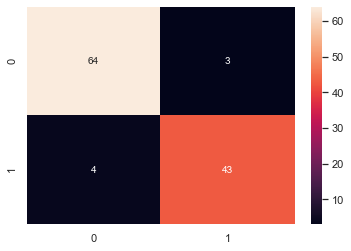

In [76]:
#Logisitic Regression Code
from sklearn.linear_model import LogisticRegression

classifier_LR = LogisticRegression(random_state = 0)
classifier_LR.fit(X_train, y_train)

#Confusion matrix and its ratios
y_pred = classifier_RF.predict(X_test)
class_report_LR = classification_report(y_test, y_pred)
cm_LR = confusion_matrix(y_test,classifier.predict(X_test))
print(class_report_LR)#performance of an algorithm/error matrix
sns.heatmap(cm_LR,annot=True,fmt='d')#Amber this is the code for formating the correlation matrix

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        67
           1       0.98      0.89      0.93        47

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



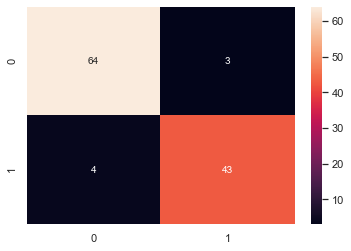

In [72]:
# Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier

classifier_RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_RF.fit(X_train, y_train)
#Confusion matrix and its ratios
y_pred = classifier_RF.predict(X_test)
class_report_RF = classification_report(y_test, y_pred)
cm_RF = confusion_matrix(y_test,classifier.predict(X_test))
print(class_report_RF)#performance of an algorithm/error matrix
sns.heatmap(cm_RF,annot=True,fmt='d')#Amber this is the code for formating the correlation matrix

This shows the 

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        67
           1       0.94      0.96      0.95        47

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



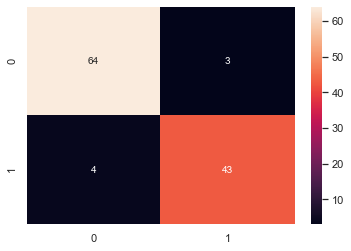

In [71]:
#Linear SVM classifier
from sklearn.svm import SVC
classifier_LSVM = SVC(kernel = 'linear', random_state = 0, probability = True)
classifier_LSVM.fit(X_train, y_train)

#Confusion matrix and its ratios
y_pred = classifier_LSVM.predict(X_test)
class_report_LSVM = classification_report(y_test, y_pred)
cm_LSVM = confusion_matrix(y_test,classifier.predict(X_test))
print(class_report_LSVM)#performance of an algorithm/error matrix
sns.heatmap(cm_LSVM,annot=True,fmt='d')#Amber this is the code for formating the correlation matrix

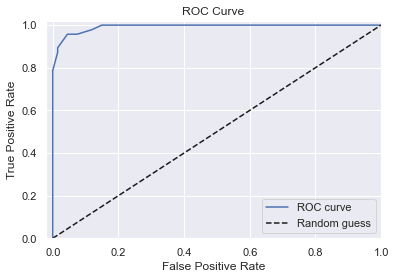

In [69]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

y_pred_prob = classifier_RF.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

### Hyperparameter Tuning

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]
forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

#### Assessing model performance

For our target variable of diagnosis, benign is the negative class (0) and malignant is the positive class (1).

Of the metrics used to assess model performance (accuracy, precision, recall), **recall seems the most appropriate for this data**.

* Accuracy: the proportion of predictions a model gets right (TP + TN / TP + TN + FP + FN)

* Precision: the proportion of positive predictions a model gets right (TP / TP + FP)

* Recall: the proportion of actual positives that were identified correctly (TP / TP + FN)

**As we are predicting disease, we want to minimise false negatives. A false negative would be a tumour being classified as benign when in fact it is malignant, and therefore the breast cancer would go undiagnosed. To minimise false negatives, we want to increase recall.**

False positives become important if the next step in this breast cancer diagnosis process is an expensive treatment. In this case, we want to minimise the number of false positives so as to minimise unnecessary expenses for treatment on patients that do nothave breast cancer.

# V. Conclusion